In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tqdm # progress bar

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Data Wrangling

In [5]:
# Check for missing values
print(train.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [6]:
# Imputing missing values
# Those with more than 50% missing values will be dropped

def missing_values():
    missing = train.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    return missing

missing_values()

Degree                     2
Dietary Habits             4
Financial Stress           4
Job Satisfaction       27910
Work Pressure          27918
Profession             36630
CGPA                  112802
Academic Pressure     112803
Study Satisfaction    112803
dtype: int64

In [7]:
# Drop columns with more than 50% missing values
for col in train.columns:
    if train[col].isnull().sum() > 0.5 * train.shape[0]:
        train.drop(col, axis=1, inplace=True)

# Drop columns with only one unique value
for col in train.columns:
    if train[col].nunique() == 1:
        train.drop(col, axis=1, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Work Pressure                          112782 non-null  float64
 8   Job Satisfaction                       112790 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140696 non-null  

In [9]:
# Impute missing values
# For numerical columns, we will impute with the mean while for categorical columns, we will impute with the mode

for col in train.columns:
    if train[col].dtype == 'int64' or train[col].dtype == 'float64':
        train[col].fillna(train[col].mean(), inplace=True)
    else:
        train[col].fillna(train[col].mode()[0], inplace=True)

train.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [10]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.000000,2.000000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.000000,3.000000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Teacher,2.998998,2.974404,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.000000,1.000000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.000000,1.000000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Visualization

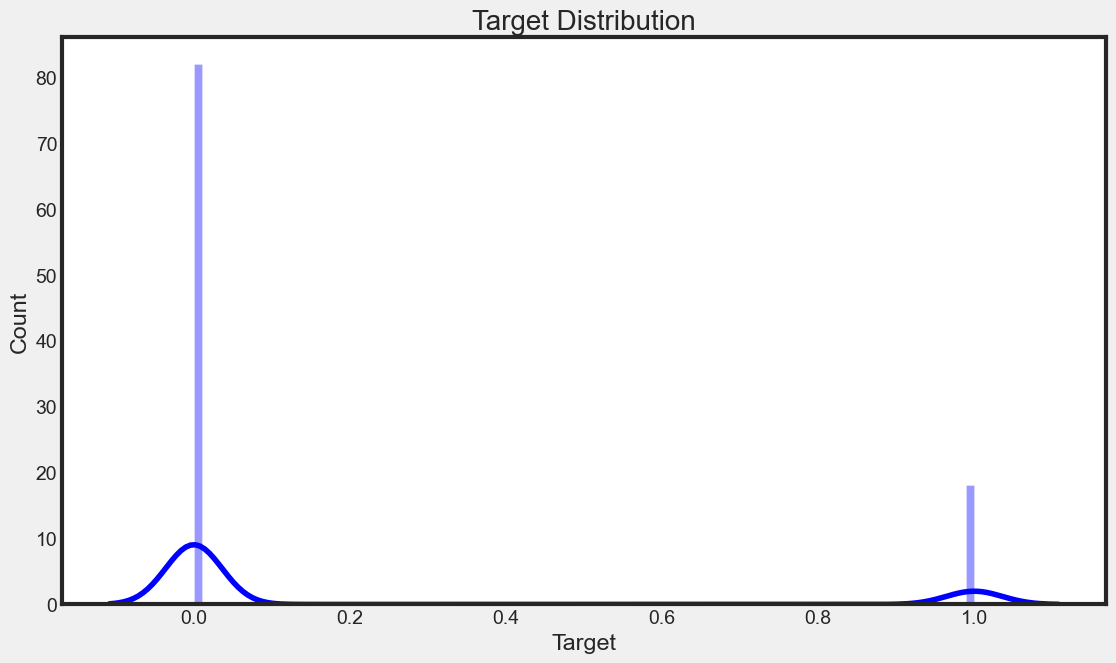

In [11]:
# Description of our train dataset with a background of white color
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
sns.set_style('white')
sns.distplot(train['Depression'], bins=100, color='blue')
plt.title('Target Distribution', fontsize=20)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

#### Insight: Our target has a class imbalance problem with the vast majority of the data being in the value of 0 while value of 1 is much suggesting tha fewer individuals are classified as having depression. This is a common problem in classification problems and can be addressed by using techniques such as oversampling, undersampling, or using a different metric to evaluate the model.

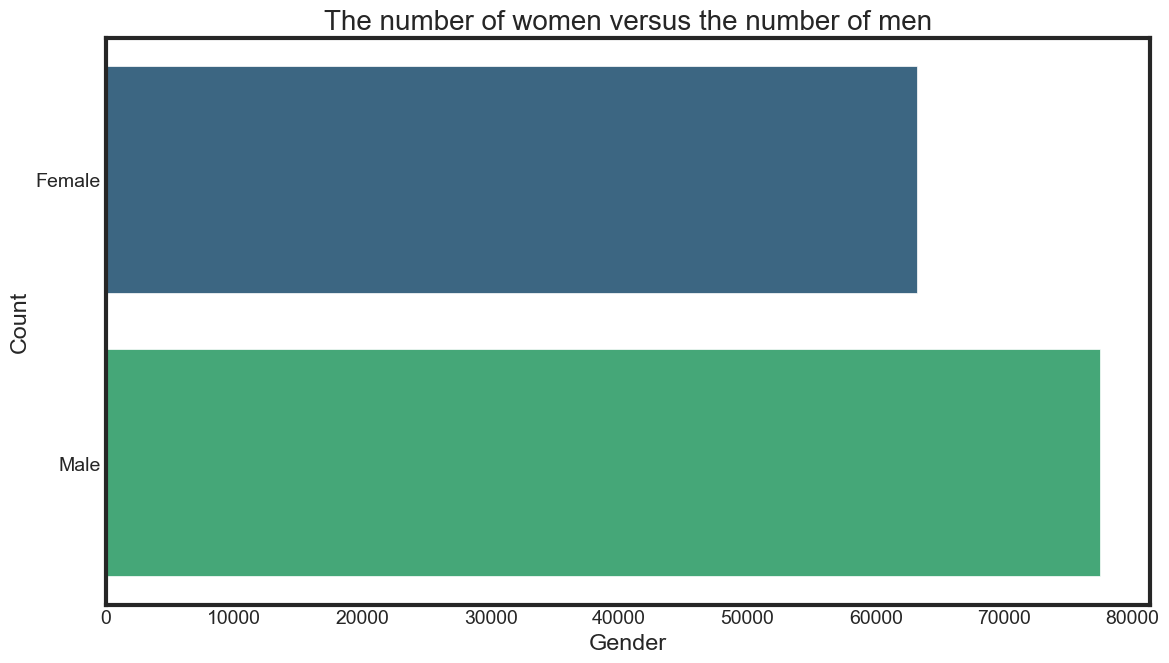

In [12]:
# Gender distribution
plt.figure(figsize=(12, 7))
sns.countplot(train["Gender"], palette='viridis')
plt.title('The number of women versus the number of men', fontsize=20)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

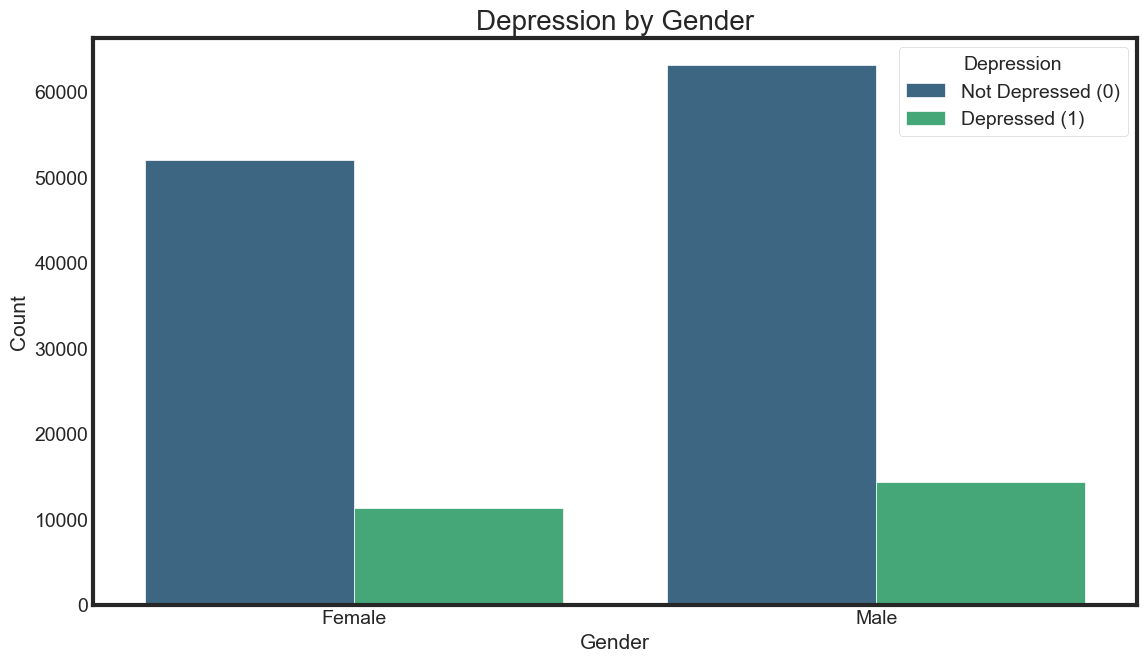

In [13]:
# Which gender is more depressed?
plt.figure(figsize=(12, 7))
sns.countplot(data=train, x='Gender', hue='Depression', palette='viridis')
plt.title('Depression by Gender', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Depression', labels=['Not Depressed (0)', 'Depressed (1)'])
plt.show()

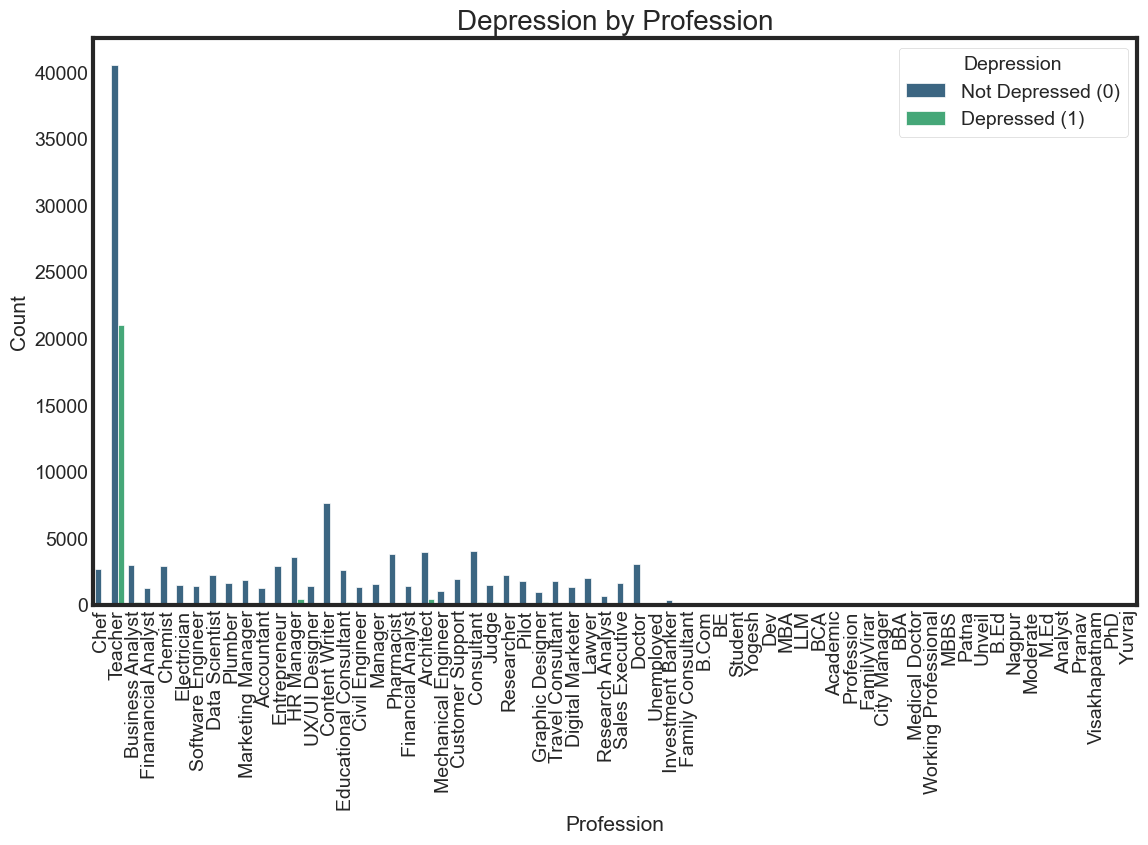

In [14]:
# Which profession is more depressed?
plt.figure(figsize=(12, 7))
sns.countplot(data=train, x='Profession', hue='Depression', palette='viridis')
plt.title('Depression by Profession', fontsize=20)
plt.xlabel('Profession', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Depression', labels=['Not Depressed (0)', 'Depressed (1)'])
plt.xticks(rotation=90)
plt.show()

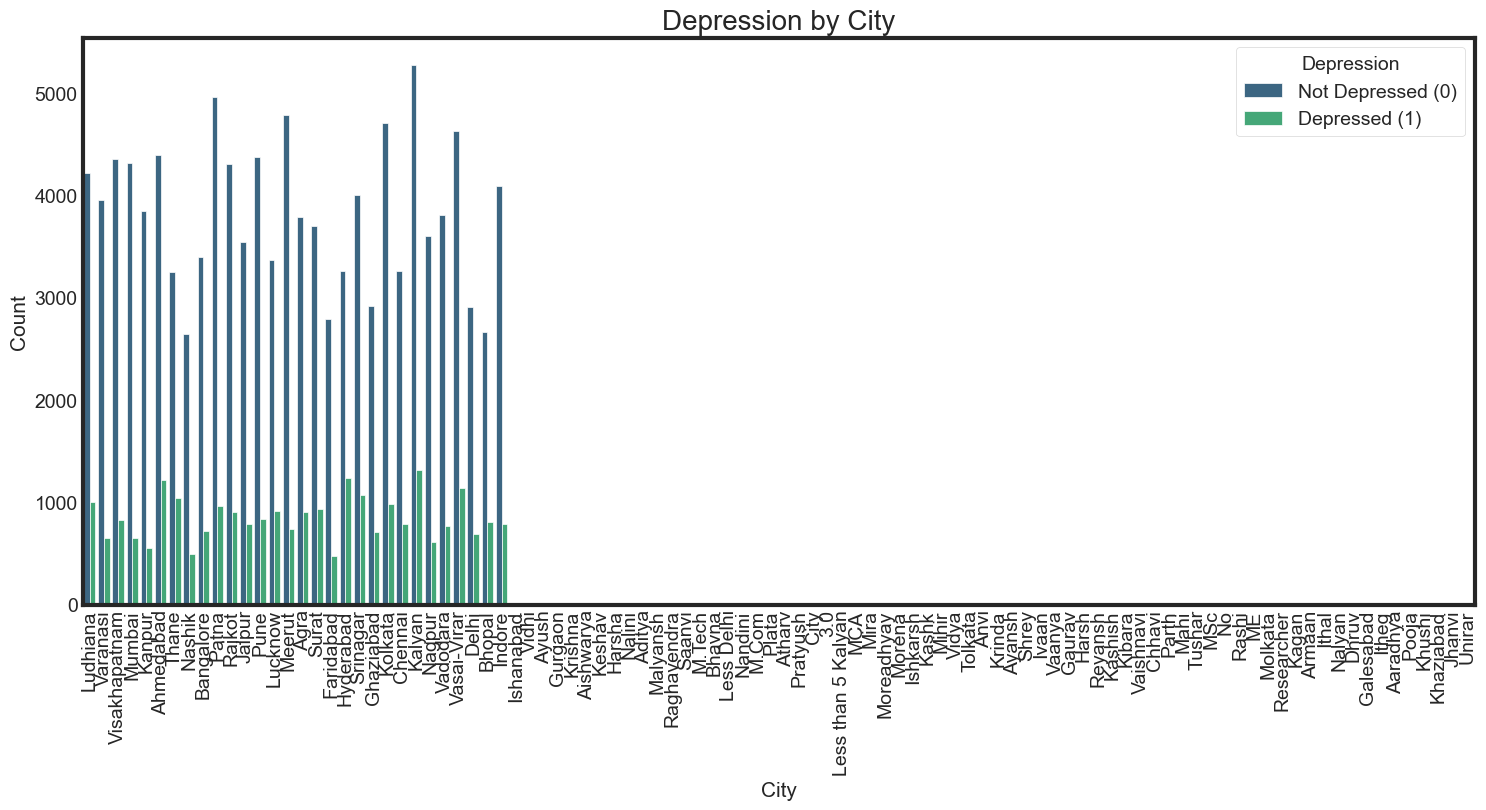

In [15]:
# Which city is more depressed?
plt.figure(figsize=(16, 7))
sns.countplot(data=train, x='City', hue='Depression', palette='viridis')
plt.title('Depression by City', fontsize=20)
plt.xlabel('City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Depression', labels=['Not Depressed (0)', 'Depressed (1)'])
plt.xticks(rotation=90)
plt.show()

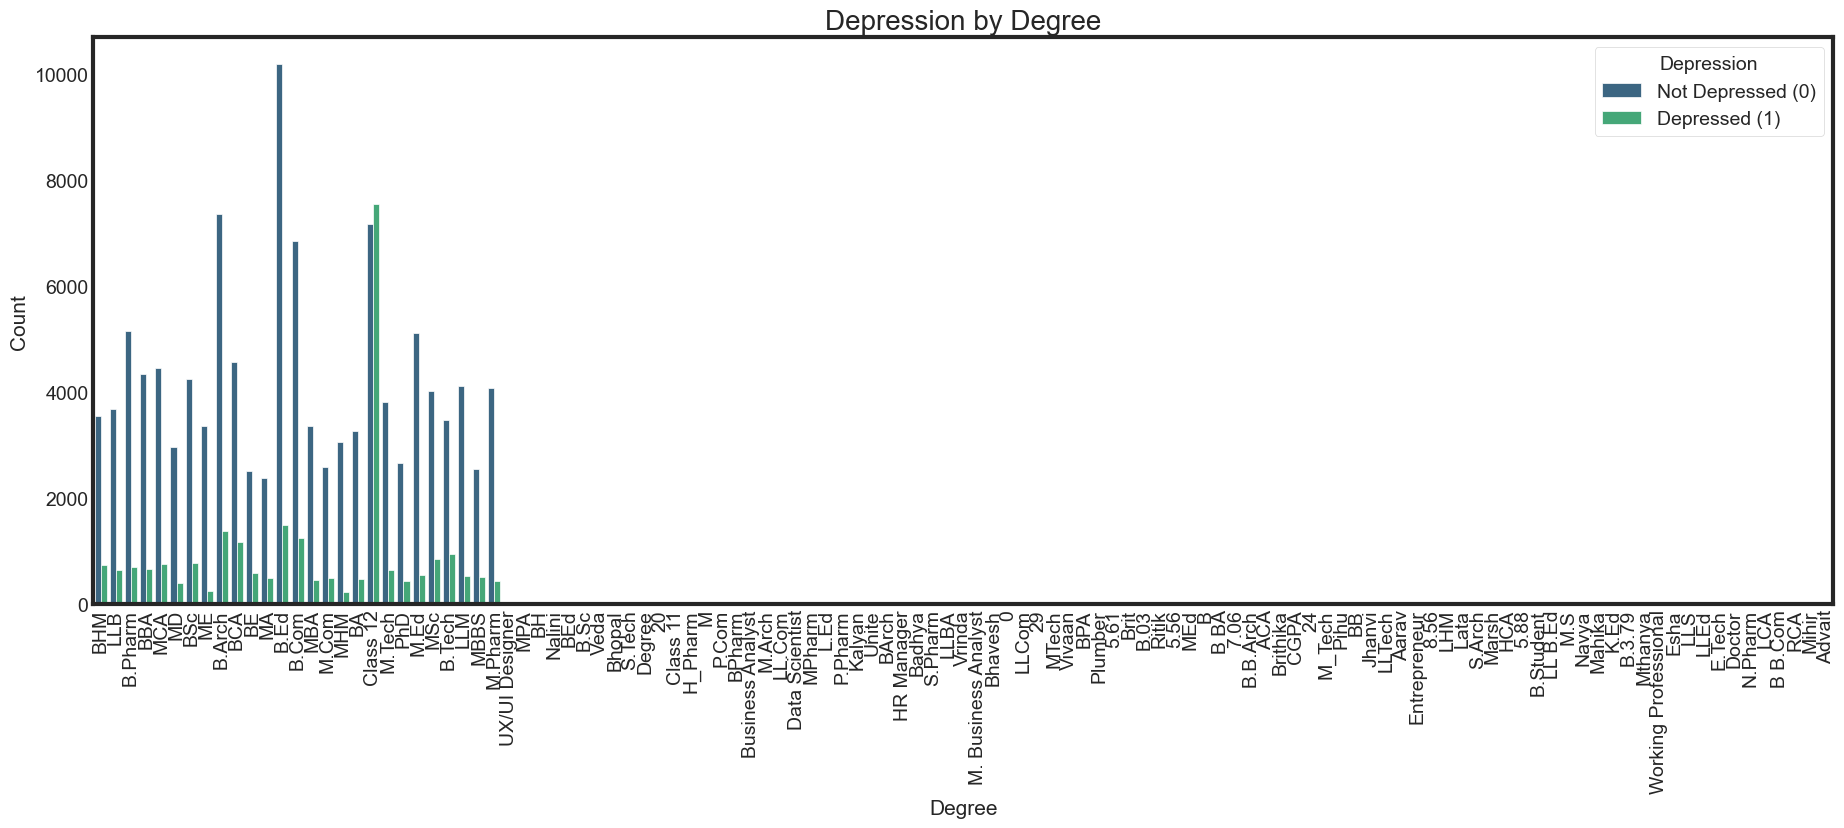

In [16]:
# Which degree is more depressed?
plt.figure(figsize=(20, 7))
sns.countplot(data=train, x='Degree', hue='Depression', palette='viridis')
plt.title('Depression by Degree', fontsize=20)
plt.xlabel('Degree', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Depression', labels=['Not Depressed (0)', 'Depressed (1)'])
plt.xticks(rotation=90)
plt.show()

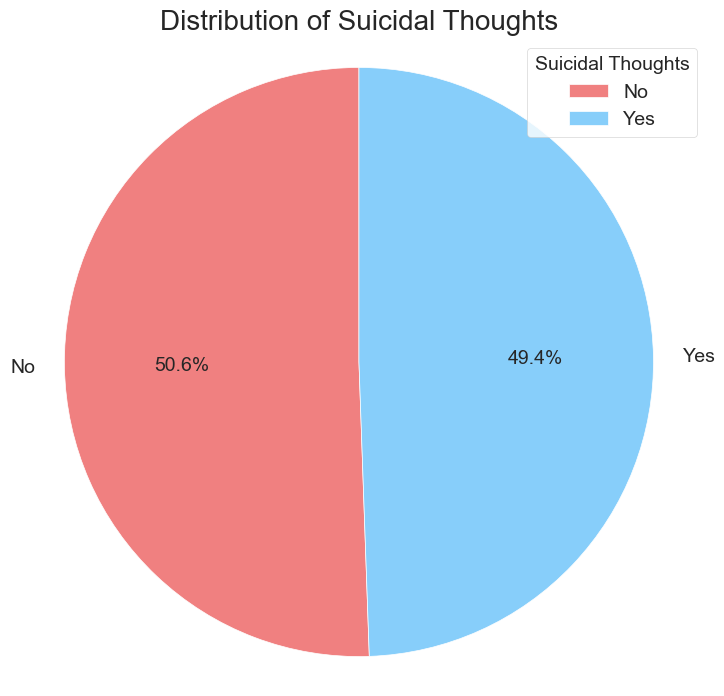

In [17]:
# Pie chart for suicidal thoughts
plt.figure(figsize=(8, 8))
suicidal_counts = train['Have you ever had suicidal thoughts ?'].value_counts()
plt.pie(suicidal_counts, labels=suicidal_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Suicidal Thoughts', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Suicidal Thoughts', labels=['No', 'Yes'], loc='upper right')
plt.show()

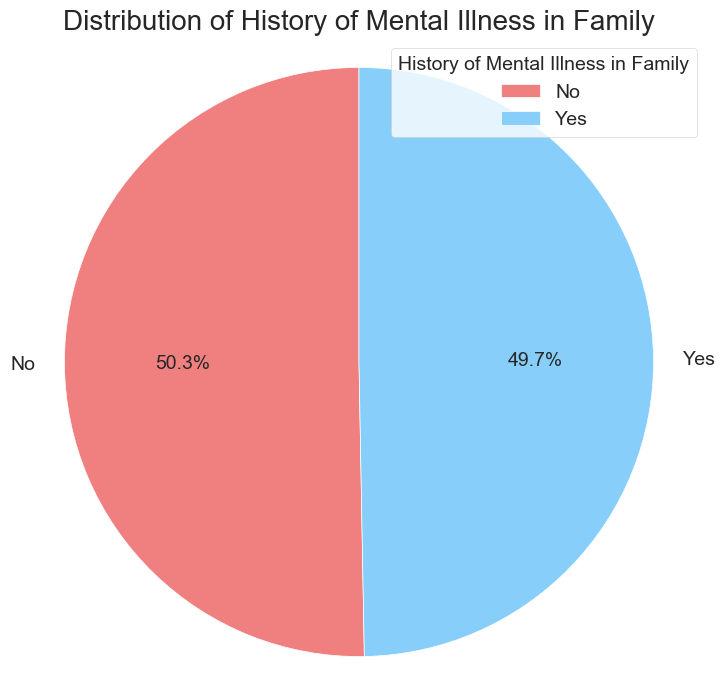

In [18]:
# Pie chart for history in mental illness in family
plt.figure(figsize=(8, 8))
family_counts = train['Family History of Mental Illness'].value_counts()
plt.pie(family_counts, labels=family_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of History of Mental Illness in Family', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='History of Mental Illness in Family', labels=['No', 'Yes'], loc='upper right')
plt.show()

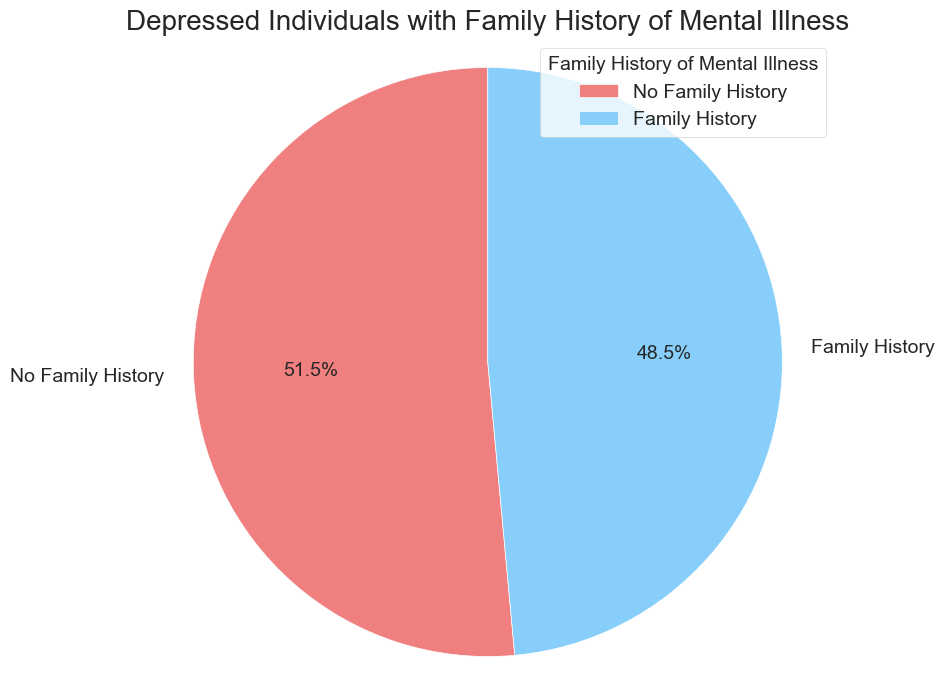

In [19]:
# Pie chart for depressed individuals with family history of mental illness
plt.figure(figsize=(8, 8))
depressed_with_family_history = train[train['Depression'] == 1]['Family History of Mental Illness'].value_counts()

# Ensure the labels match the values
labels = ['No Family History', 'Family History'] if 'No' in depressed_with_family_history.index and 'Yes' in depressed_with_family_history.index else depressed_with_family_history.index

plt.pie(depressed_with_family_history, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Depressed Individuals with Family History of Mental Illness', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Family History of Mental Illness', labels=labels, loc='upper right')
plt.show()

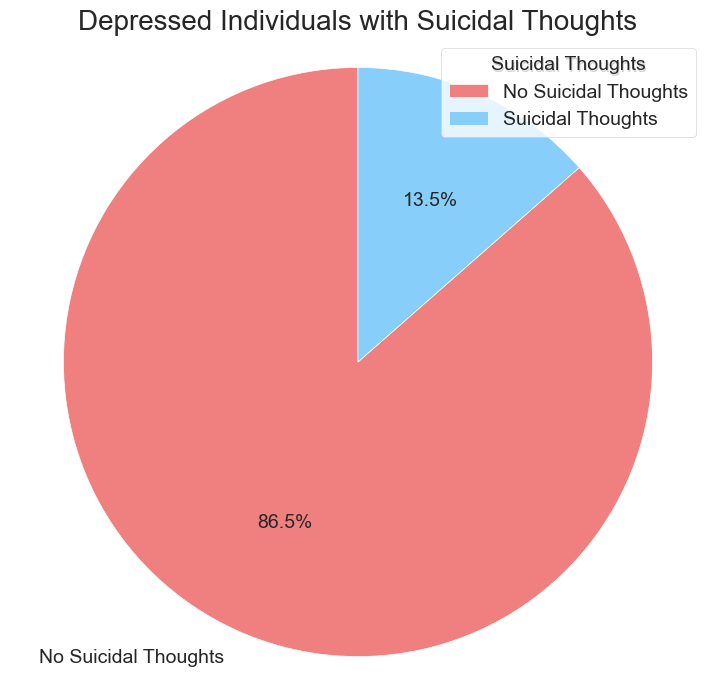

In [20]:
# Depressed individuals with suicidal thoughts pie chart
plt.figure(figsize=(8, 8))
depressed_with_suicidal_thoughts = train[train['Depression'] == 1]['Have you ever had suicidal thoughts ?'].value_counts()

# Ensure the labels match the values
labels = ['No Suicidal Thoughts', 'Suicidal Thoughts'] if 'No' in depressed_with_suicidal_thoughts.index and 'Yes' in depressed_with_suicidal_thoughts.index else depressed_with_suicidal_thoughts.index

plt.pie(depressed_with_suicidal_thoughts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Depressed Individuals with Suicidal Thoughts', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Suicidal Thoughts', labels=labels, loc='upper right')
plt.show()

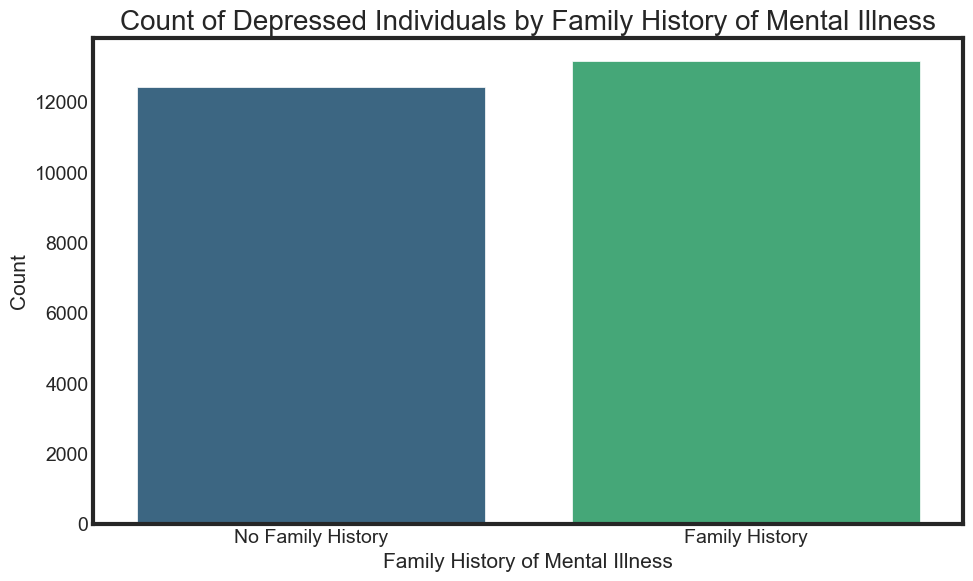

In [21]:
# Bar graph for depressed individuals with family history of mental illness
plt.figure(figsize=(10, 6))
sns.countplot(data=train[train['Depression'] == 1], x='Family History of Mental Illness', palette='viridis')
plt.title('Count of Depressed Individuals by Family History of Mental Illness', fontsize=20)
plt.xlabel('Family History of Mental Illness', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(ticks=[0, 1], labels=['No Family History', 'Family History'])  # Ensure labels are clear
plt.show()

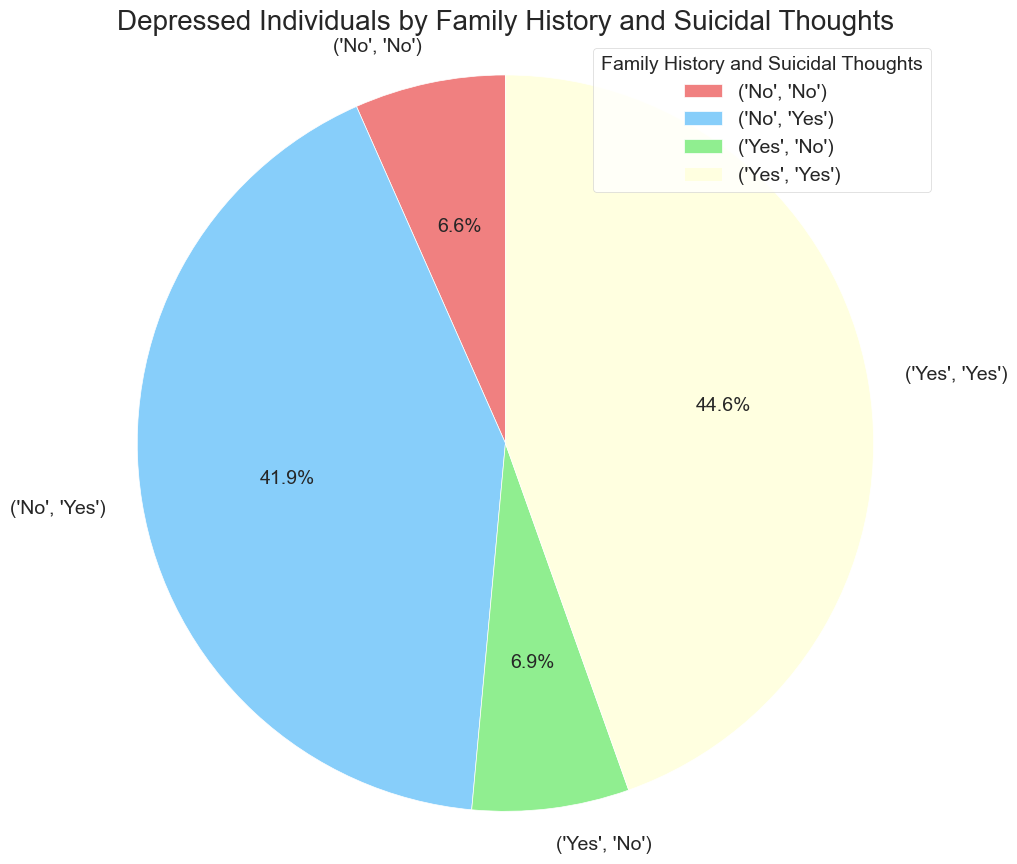

In [22]:
# Create a new DataFrame for the pie chart
depressed_data = train[train['Depression'] == 1]

# Group by Family History and Suicidal Thoughts
grouped_counts = depressed_data.groupby(['Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']).size()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(grouped_counts, labels=grouped_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow'])
plt.title('Depressed Individuals by Family History and Suicidal Thoughts', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Family History and Suicidal Thoughts', loc='upper right')
plt.show()

## Machine Learning Modelling

In [23]:
target = train['Depression']
train.drop('Depression', axis=1, inplace=True)

# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = le.fit_transform(train[col])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

# Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model building
from sklearn.linear_model import LogisticRegression

# But first we remember that we have an imbalanced dataset
# We will use SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9067164179104478
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     22986
           1       0.68      0.92      0.78      5154

    accuracy                           0.91     28140
   macro avg       0.83      0.91      0.86     28140
weighted avg       0.93      0.91      0.91     28140

[[20755  2231]
 [  394  4760]]


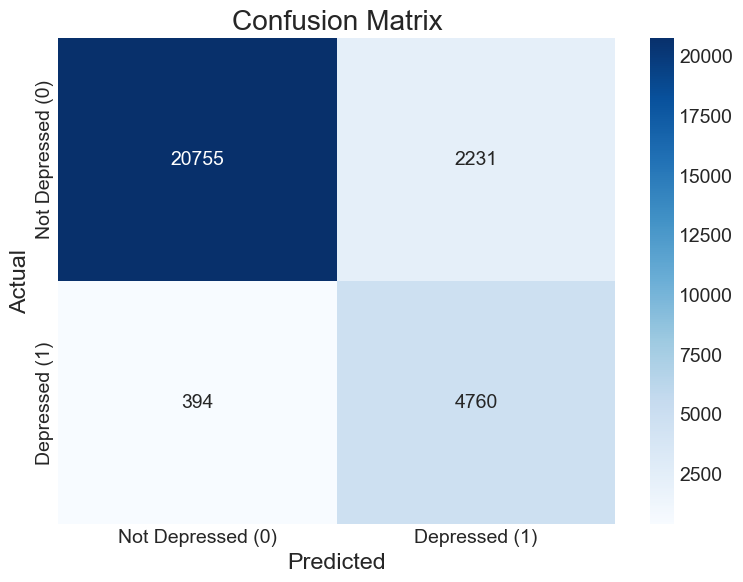

In [24]:
# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your true labels and predictions
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed (0)', 'Depressed (1)'], yticklabels=['Not Depressed (0)', 'Depressed (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
# Random Forest Classifier


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.927683013503909
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     22986
           1       0.79      0.83      0.81      5154

    accuracy                           0.93     28140
   macro avg       0.87      0.89      0.88     28140
weighted avg       0.93      0.93      0.93     28140

[[21829  1157]
 [  878  4276]]


In [26]:
# XGboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9292821606254442
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     22986
           1       0.80      0.82      0.81      5154

    accuracy                           0.93     28140
   macro avg       0.88      0.89      0.88     28140
weighted avg       0.93      0.93      0.93     28140

[[21937  1049]
 [  941  4213]]


The ROC AUC score is:  0.8858934430604973


Text(0, 0.5, 'True Positive Rate')

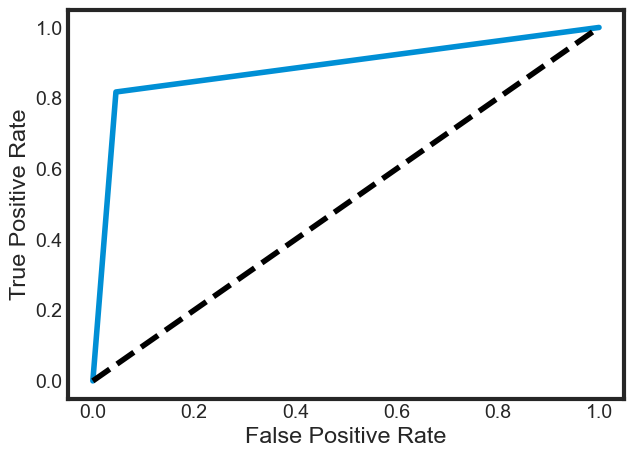

In [27]:
# ROC AUC score
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print("The ROC AUC score is: ", roc_auc)

# roc curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Test set

In [28]:
# Preprocessing the test set

# Drop columns with more than 50% missing values
for col in test.columns:
    if test[col].isnull().sum() > 0.5 * test.shape[0]:
        test.drop(col, axis=1, inplace=True)

# Drop columns with only one unique value
for col in test.columns:
    if test[col].nunique() == 1:
        test.drop(col, axis=1, inplace=True)


# Impute missing values

for col in test.columns:

    if test[col].dtype == 'int64' or test[col].dtype == 'float64':
        test[col].fillna(test[col].mean(), inplace=True)
    else:
        test[col].fillna(test[col].mode()[0], inplace=True)

# Encoding categorical columns

le = LabelEncoder()

for col in test.columns:
    if test[col].dtype == 'object':
        test[col] = le.fit_transform(test[col])

# Feature scaling

scaler = StandardScaler()

test = scaler.fit_transform(test)

# Predictions
predictions = rf.predict(test)

# Save the predictions to a CSV file
output = pd.DataFrame({'Depression': predictions})
output.to_csv('submission.csv', index=False)


In [29]:
sample = pd.read_csv('sample_submission.csv')

sample.head()


,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0


In [32]:
# Step 2: Create a DataFrame for Predictions
# Assuming 'id' is the column in the sample submission and y_pred_test contains your predictions
submission = pd.DataFrame({
    'id': sample['id'],  # Use the IDs from the sample submission
    'Depression': predictions      # Use your predictions
})

# Step 3: Save the Submission File
submission.to_csv('submit.csv', index=False)